# **データの基本事項確認としての前処理**

 4.1 取引履歴データ transaction_history.csvの読み込み

In [1]:
#pandasパッケージを、以降はpdという名前で呼び出しますという宣言です.
import pandas as pd

In [2]:
#データセットの読み込み(dfにcsvデータを読み込む)
#ここでは、本番用に用意した利用実績のデータを読み込みます
df = pd.read_csv('transaction_history.csv')

In [3]:
#データを確認します
df

,customer_id,product_id,purchase_date,purchase_amount,redeem_coupon,final_settlement_amount,payment_method,purchase_channel
0,23085,G03257PD,2020/3/13,7200,True,6200.0,現金,2
1,15469,CKZF21ZC,2023/3/29,15400,False,NaN,カード,2
2,15482,7NSE0G0R,2023/12/26,15400,False,NaN,現金,1
3,17107,WVCPYZBH,2021/2/19,17100,False,NaN,カード,2
4,24156,OELTJ7E2,2020/10/8,24100,True,23100.0,カード,1
...,...,...,...,...,...,...,...,...
458162,24236,YF829ECH,2022/9/16,188800,False,NaN,カード,1
458163,12691,SPDDDXY2,2020/3/13,177200,False,NaN,カード,2
458164,24355,UA56Q0XP,2022/1/11,141700,False,NaN,現金,2
458165,24126,G4WT97YC,2019/3/21,224400,False,NaN,現金,1


4.2 describe()メソッドによる基本統計量の確認

In [4]:
#基本統計量は、下記の関数で各カラムごとに確認することができます.
df.describe()

,customer_id,purchase_amount,final_settlement_amount,purchase_channel
count,458167.000000,458167.000000,16872.000000,458167.000000
mean,191266.920025,84456.761617,79702.982693,1.715857
std,83365.046865,96068.130787,90292.655099,0.917299
min,10000.000000,5000.000000,5035.000000,1.000000
25%,124531.500000,9300.000000,8835.000000,1.000000
50%,216051.000000,63000.000000,59565.000000,2.000000
75%,265586.000000,108600.000000,103402.000000,2.000000
max,287234.000000,981600.000000,843315.000000,6.000000


4.3 dtypesメソッドによるデータ型の確認

In [5]:
#データ型を確認します
df.dtypes

,0
customer_id,int64
product_id,object
purchase_date,object
purchase_amount,int64
redeem_coupon,bool
final_settlement_amount,float64
payment_method,object
purchase_channel,int64


4.4 astype()メソッドによるデータ型の変換

In [ ]:
# pandasでデータ型を変換します
df['customer_id'] = df['customer_id'].astype('object')
df.dtypes

,0
customer_id,object
product_id,object
purchase_date,object
purchase_amount,int64
redeem_coupon,bool
final_settlement_amount,float64
payment_method,object
purchase_channel,int64


4.5 文字列として読み込む

In [8]:
# 今回用意しているデータセットのcustomer_idは、00000001といった、いわゆるゼロ埋めの連番を数値を使っています。
# これを誤認識させないためには、取り込み時に「文字列として読み込む」ことが重要です。

# csutomer_idを文字列として指定し取り込み
df = pd.read_csv('transaction_history.csv', dtype={'customer_id': str})
df.head()

,customer_id,product_id,purchase_date,purchase_amount,redeem_coupon,final_settlement_amount,payment_method,purchase_channel
0,00023085,G03257PD,2020/3/13,7200,True,6200.0,現金,2
1,00015469,CKZF21ZC,2023/3/29,15400,False,NaN,カード,2
2,00015482,7NSE0G0R,2023/12/26,15400,False,NaN,現金,1
3,00017107,WVCPYZBH,2021/2/19,17100,False,NaN,カード,2
4,00024156,OELTJ7E2,2020/10/8,24100,True,23100.0,カード,1


4.6 平均値の取得

In [ ]:
#平均値の取得
print('平均',df['purchase_amount'].mean())

平均 84456.76161748882


4.7 中央値の取得

4.8 最頻値の取得

In [ ]:
#中央値の取得
print('中央値',df['purchase_amount'].median())

中央値 63000.0


In [ ]:
#最頻値の取得
print('最頻値',df['purchase_amount'].mode())

最頻値 0    150000
Name: purchase_amount, dtype: int64


4.9 合計の取得

In [ ]:
#合計の取得
print('合計',df['purchase_amount'].sum())

合計 38695301100


4.10 分散と標準偏差の取得

In [ ]:
#分散と標準偏差の取得
print('分散', df['purchase_amount'].var(ddof=1))
#標準偏差
print('標準偏差', df['purchase_amount'].std(ddof=1))

分散 9229085752.911667
標準偏差 96068.13078701837


4.11 最大値と最小値の取得

In [ ]:
#最大値と最小値の取得
#最大値
print('最大', df['purchase_amount'].max())
#最小値
print('最小',df['purchase_amount'].min())

最大 981600
最小 5000


4.12 歪度と尖度の取得

In [ ]:
#歪度と尖度の取得
#歪度
print('歪度',df['purchase_amount'].skew())
#尖度
print('尖度',df['purchase_amount'].kurt())

歪度 1.7914578693278291
尖度 3.7371607019147914


 4.13 Excel のシリアル値混入への対処

In [ ]:
# purchase_dateのobject型をdatetime型に変換
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format='%Y-%m-%d', errors='coerce')
df.dtypes

,0
customer_id,object
product_id,object
purchase_date,datetime64[ns]
purchase_amount,int64
redeem_coupon,bool
final_settlement_amount,float64
payment_method,object
purchase_channel,int64


 4.14 ヒストグラムの描画

In [9]:
#ヒストグラムの描画に必要なライブラリをインポートします。
!pip install japanize-matplotlib
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 71.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=e9753c969da131efefc6c5990abd9192bbeacc7aa96ae79b59b36c77e4235ad5
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize-matplotlib


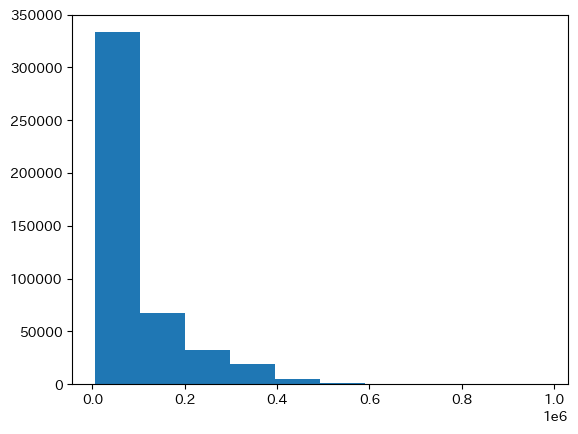

In [10]:
#ヒストグラムの描画
plt.hist(x = df['purchase_amount'], bins=10) #bins:階級の数
plt.show()

 4.15 ヒストグラムの描画（ビンの幅を調整）

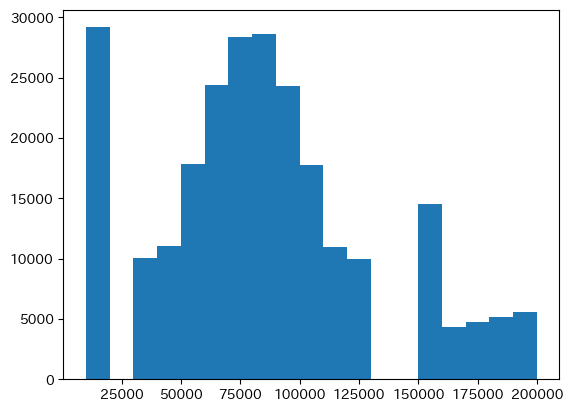

In [11]:
#ビンの幅を指定してみましょう。
bins = [10000,20000,30000,30000,40000,50000,60000,70000,80000,90000,100000,110000,120000,130000,140000,150000,160000,170000,180000,190000,200000]
plt.hist(x = df['purchase_amount'],bins=bins)
plt.show()

4.16 σを用いた外れ値の検出

In [12]:
# 3シグマルールでの外れ値検出
mean_purchase = df['purchase_amount'].mean()      # 平均値
std_purchase = df['purchase_amount'].std()        # 標準偏差

# ±3シグマ範囲を計算
lower_limit = mean_purchase - 3 * std_purchase
upper_limit = mean_purchase + 3 * std_purchase

# 外れ値の抽出
outliers_sigma = df[(df['purchase_amount'] < lower_limit) | (df['purchase_amount'] > upper_limit)]

# 外れ値の件数を表示
print(f"3シグマルールによる外れ値の件数: {len(outliers_sigma)}")
print("外れ値のデータ:")
outliers_sigma.head()

3シグマルールによる外れ値の件数: 8105
外れ値のデータ:


,customer_id,product_id,purchase_date,purchase_amount,redeem_coupon,final_settlement_amount,payment_method,purchase_channel
49,00010044,WFX6UYXX,2020/8/22,408700,False,NaN,電子マネー,2
183,00010178,0JALBJS2,2020/12/27,431300,False,NaN,コード決済,1
216,00010211,NF4GVAFA,2018/8/28,427500,False,NaN,現金,1
235,00010230,38V3AJIU,2022/7/6,385500,False,NaN,現金,5
249,00010244,UZM3TDTF,2019/7/15,399400,False,NaN,現金,4


4.17 外れ値の検出コード

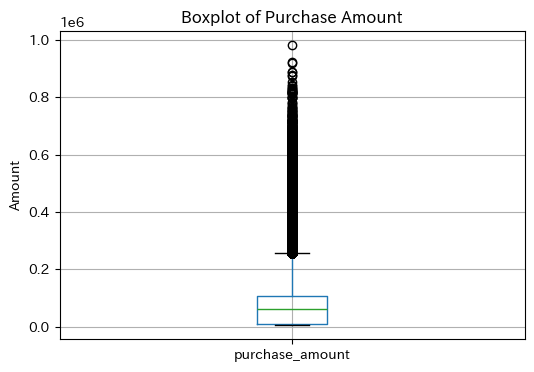

In [ ]:
# dfのpurchase_amountの箱ひげ図を描画
plt.figure(figsize=(6, 4))
df.boxplot(column='purchase_amount')
plt.title('Boxplot of Purchase Amount')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

In [ ]:
# 外れ値の検出（IQRルール）
q1 = df['purchase_amount'].quantile(0.25)
q3 = df['purchase_amount'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [ ]:
# 外れ値の行を抽出
outliers = df[(df['purchase_amount'] < lower_bound) | (df['purchase_amount'] > upper_bound)]
outliers

,customer_id,product_id,purchase_date,purchase_amount,redeem_coupon,final_settlement_amount,payment_method,purchase_channel
21,00010016,AOICW3WO,NaT,286100,False,NaN,現金,2
24,00010019,N3R4MUJZ,NaT,348100,False,NaN,カード,2
49,00010044,WFX6UYXX,NaT,408700,False,NaN,電子マネー,1
61,00010056,22KUXMYI,NaT,288600,False,NaN,カード,2
62,00010057,3VTRPCMJ,NaT,278700,False,NaN,カード,2
...,...,...,...,...,...,...,...,...
458108,00287181,B5PAWT1T,NaT,339800,False,NaN,コード決済,2
458121,00287194,WRH06AKB,NaT,300000,False,NaN,現金,1
458125,00287198,E6SBIX29,NaT,411400,False,NaN,電子マネー,2
458126,00287199,E6SBIX29,NaT,402900,False,NaN,電子マネー,2
